In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import STL

In [5]:
df = pd.read_csv("/Users/sonavaneonkar/Downloads/Data/stock.txt", parse_dates = ['Date'], index_col = ['Date'])
df.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2012-05-18,42.05,45.00,38.00,38.23,580438450,0
2012-05-21,36.53,36.66,33.00,34.03,169418988,0
2012-05-22,32.61,33.59,30.94,31.00,101876406,0
2012-05-23,31.37,32.50,31.36,32.00,73678512,0
2012-05-24,32.95,33.21,31.77,33.03,42560731,0


In [6]:
df.describe()

,Open,High,Low,Close,Volume,OpenInt
count,1381.000000,1381.000000,1381.000000,1381.000000,1.381000e+03,1381.0
mean,83.543667,84.384940,82.630555,83.543827,3.770716e+07,0.0
std,43.981535,44.161698,43.756570,44.015093,3.294912e+07,0.0
min,18.080000,18.270000,17.550000,17.730000,5.913000e+06,0.0
25%,46.750000,47.530000,45.960000,46.700000,1.843043e+07,0.0
50%,78.600000,79.690000,77.930000,78.790000,2.812660e+07,0.0
75%,117.710000,118.600000,116.700000,117.650000,4.601640e+07,0.0
max,182.360000,182.900000,180.570000,182.660000,5.804384e+08,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1381 entries, 2012-05-18 to 2017-11-10
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open     1381 non-null   float64
 1   High     1381 non-null   float64
 2   Low      1381 non-null   float64
 3   Close    1381 non-null   float64
 4   Volume   1381 non-null   int64  
 5   OpenInt  1381 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 75.5 KB


In [8]:
df.isna().sum()

Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

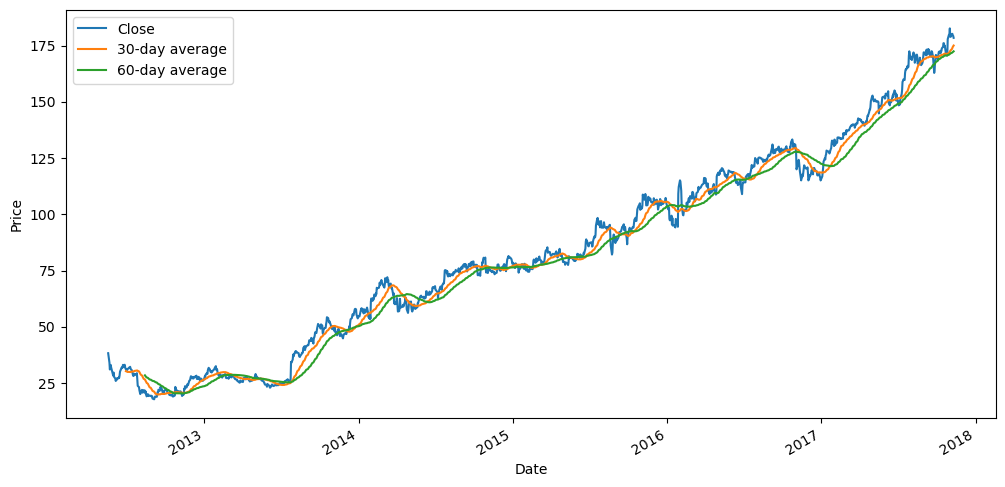

In [10]:
df['Close'].plot(figsize=(12, 6), label='Close')
df['Close'].rolling(window=30).mean().plot(label='30-day average')
df['Close'].rolling(window=60).mean().plot(label='60-day average')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

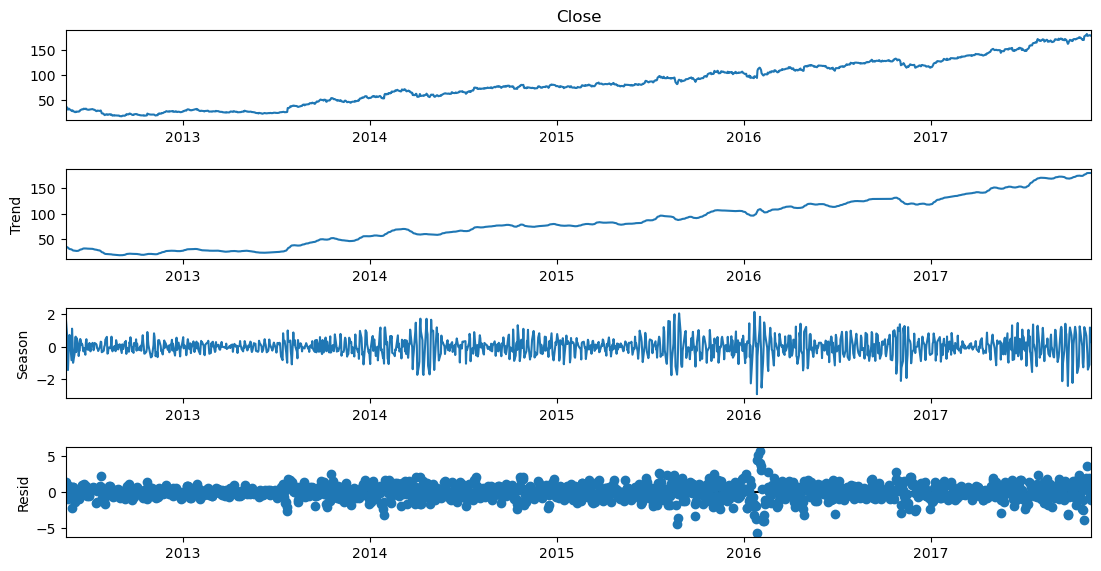

In [16]:
result = STL(df["Close"], period = 7).fit()
fig = result.plot()
fig.set_size_inches(12, 6)

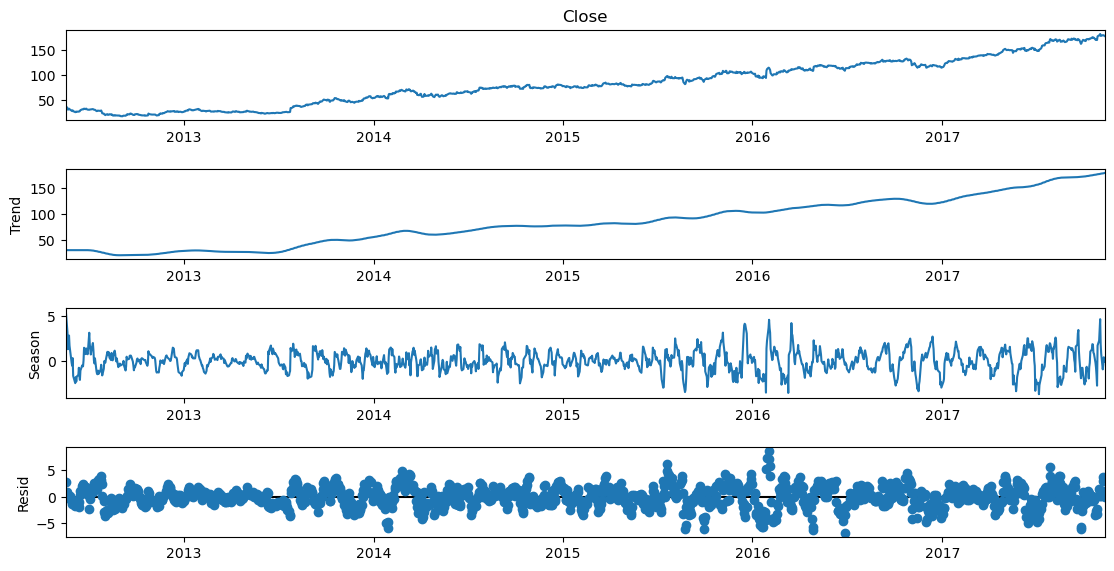

In [17]:
result = STL(df["Close"], period = 30).fit()
fig = result.plot()
fig.set_size_inches(12, 6)

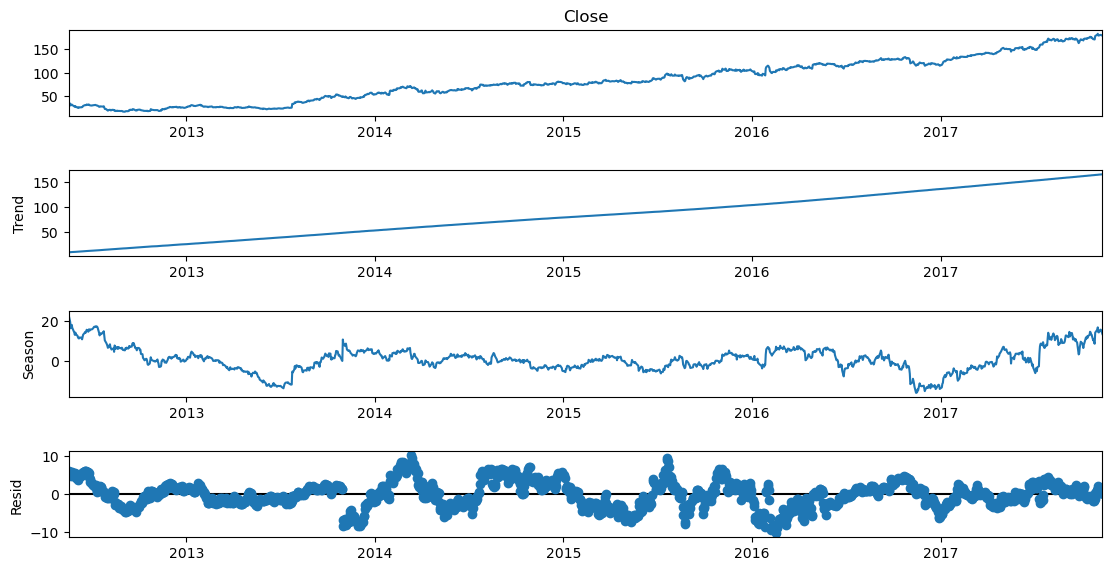

In [18]:
result = STL(df["Close"], period = 365).fit()
fig = result.plot()
fig.set_size_inches(12, 6)

<Axes: >

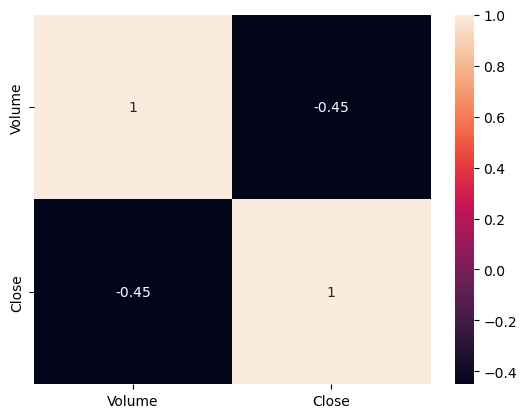

In [19]:
corr = df[["Volume", "Close"]].corr()
sns.heatmap(corr, annot = True)